<a href="https://colab.research.google.com/github/Nckflannery/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [232]:
# Revert to Pandas version 0.23.4
!pip install pandas==0.23.4
# Import Pandas
import pandas as pd
# Import our data set
exercise_data_url = 'https://raw.githubusercontent.com/Nckflannery/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv'
exd = pd.read_csv(exercise_data_url, index_col=0)
# Include index_col=0 to account for index column being included as first column
# in csv file

In [0]:
age_bins = pd.cut(exd['age'], 5)
exercise_bins = pd.cut(exd['exercise_time'], 5)
weight_bins = pd.cut(exd['weight'], 5)

In [258]:
pd.crosstab([age_bins, exercise_bins], weight_bins, normalize='columns')
#It's a little difficult to see, but the data suggests that the younger and more
#Exercise a person gets the less their weight. 

weight                         (99.854, 129.2]       ...        (216.8, 246.0]
age            exercise_time                         ...                      
(17.938, 30.4] (-0.3, 60.0]           0.026667       ...              0.132075
               (60.0, 120.0]          0.024000       ...              0.000000
               (120.0, 180.0]         0.045333       ...              0.000000
               (180.0, 240.0]         0.050667       ...              0.000000
               (240.0, 300.0]         0.066667       ...              0.000000
(30.4, 42.8]   (-0.3, 60.0]           0.021333       ...              0.132075
               (60.0, 120.0]          0.050667       ...              0.000000
               (120.0, 180.0]         0.050667       ...              0.000000
               (180.0, 240.0]         0.066667       ...              0.000000
               (240.0, 300.0]         0.088000       ...              0.000000
(42.8, 55.2]   (-0.3, 60.0]           0.018667       ...              0.132075
               (60.0, 120.0]          0.016000       ...              0.018868
               (120.0, 180.0]         0.024000       ...              0.000000
               (180.0, 240.0]         0.048000       ...              0.000000
               (240.0, 300.0]         0.101333       ...              0.000000
(55.2, 67.6]   (-0.3, 60.0]           0.018667       ...              0.150943
               (60.0, 120.0]          0.026667       ...              0.018868
               (120.0, 180.0]         0.034667       ...              0.000000
               (180.0, 240.0]         0.032000       ...              0.000000
               (240.0, 300.0]         0.029333       ...              0.000000
(67.6, 80.0]   (-0.3, 60.0]           0.056000       ...              0.283019
               (60.0, 120.0]          0.056000       ...              0.132075
               (120.0, 180.0]         0.034667       ...              0.000000
               (180.0, 240.0]         0.013333       ...              0.000000

[24 rows x 5 columns]

In [259]:
pd.crosstab([exercise_bins, age_bins], weight_bins, normalize='columns')
#Here, we see that while age does slight correlation to weight, exercise amount
#has a very strong correlation to weight

weight                         (99.854, 129.2]       ...        (216.8, 246.0]
exercise_time  age                                   ...                      
(-0.3, 60.0]   (17.938, 30.4]         0.026667       ...              0.132075
               (30.4, 42.8]           0.021333       ...              0.132075
               (42.8, 55.2]           0.018667       ...              0.132075
               (55.2, 67.6]           0.018667       ...              0.150943
               (67.6, 80.0]           0.056000       ...              0.283019
(60.0, 120.0]  (17.938, 30.4]         0.024000       ...              0.000000
               (30.4, 42.8]           0.050667       ...              0.000000
               (42.8, 55.2]           0.016000       ...              0.018868
               (55.2, 67.6]           0.026667       ...              0.018868
               (67.6, 80.0]           0.056000       ...              0.132075
(120.0, 180.0] (17.938, 30.4]         0.045333       ...              0.000000
               (30.4, 42.8]           0.050667       ...              0.000000
               (42.8, 55.2]           0.024000       ...              0.000000
               (55.2, 67.6]           0.034667       ...              0.000000
               (67.6, 80.0]           0.034667       ...              0.000000
(180.0, 240.0] (17.938, 30.4]         0.050667       ...              0.000000
               (30.4, 42.8]           0.066667       ...              0.000000
               (42.8, 55.2]           0.048000       ...              0.000000
               (55.2, 67.6]           0.032000       ...              0.000000
               (67.6, 80.0]           0.013333       ...              0.000000
(240.0, 300.0] (17.938, 30.4]         0.066667       ...              0.000000
               (30.4, 42.8]           0.088000       ...              0.000000
               (42.8, 55.2]           0.101333       ...              0.000000
               (55.2, 67.6]           0.029333       ...              0.000000

[24 rows x 5 columns]

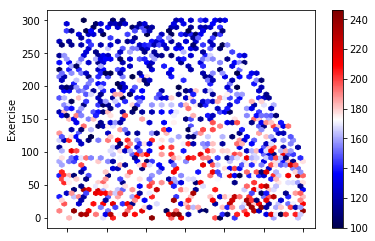

In [245]:
#Create dataset to plot using info from csv
df = pd.DataFrame({'Age': exd['age'], 'Exercise': exd['exercise_time'], 'Weight': exd['weight']})
#Plot using Age and Exercise to show the effect they have on weight
df.plot.hexbin(x='Age', y='Exercise', C='Weight', gridsize=50, cmap='seismic');

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?

Age, Weight, and Exercise Minutes/Week
2.  What are the relationships between the variables?

Age and exercise amount have an effect on a persons weight. 
3.  Which relationships are "real", and which spurious?

Exercise amount is very stronly related to weight.
While I wouldn't call it spurious, age is only weakly related to weight.


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)